<center><font size = "10"> Week 12 - Network Simulation III <center>
<center><font size = "8">Home Work <center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 1
<br>Group member1: Gasser Elbanna
<br>Group member2: Milo Imbeni
<br>Group member3: Louise Placidet

<font size='5'><font color='red'>__IMPORTANT!!__ Read the document "ReadBefore.pdf" before working on these homework

# Ex1. Simple network simulation

<font size='3'>Using the modules __sim__ and __specs__ from NetPyNe and same morphological, physiological, synaptic and stimulation parameters as in tutorial 01 for all populations, create a simple network of soma neurons configured as follows:

<font size='3'>Two populations of 10 pyramidal cells and one population of 20 pyramidal cells respectively using the standard compartmental Hodgkin-Huxley type cell (HH), where the two smaller populations are connected to the larger one using the same connection parameters (divergence, weight, delay, synMech) as in tutorial 01.
    
<font size='3'>Run a simulation of 600 ms, internal integration time steps of 0.02 ms and record steps time of 0.1 ms. Plot the raster plot of all the cells and the 2D network representation of the cell locations and connections. 

<font size='3'>
What do you observe regarding the firing rates of your three populations ? Explain. [1.5 pts]

## Step 1: Importing libraries

In [1]:
from netpyne import specs, sim

%matplotlib inline

## Step 2: Defining the network parameters

In [2]:
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

### 2.1 Defining the Cell Populations

In [3]:
# Population parameters
# The 2 smaller populations 
netParams.popParams['cell1'] = {'cellType': 'PYR', 'numCells': 10, 'cellModel': 'HH'}
netParams.popParams['cell2'] = {'cellType': 'PYR', 'numCells': 10, 'cellModel': 'HH'}

# The 1 larger population
netParams.popParams['cell3'] = {'cellType': 'PYR', 'numCells': 20, 'cellModel': 'HH'}

### 2.2. Define Cell Morphologies and Physiology

In [4]:
## Cell property rules
cellRule = {'conds': {'cellType': 'PYR'},  'secs': {}}  # cell rule dict
cellRule['secs']['soma'] = {'geom': {}, 'mechs': {}}   # soma params dict
cellRule['secs']['soma']['geom'] = {'diam': 18.8, 'L': 18.8, 'Ra': 123.0}  # soma geometry
cellRule['secs']['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70} # soma hh mechanism
netParams.cellParams['PYRrule'] = cellRule # add dict to list of cell params

### 2.3. Define Synaptic Mechanism

In [5]:
## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 5.0, 'e': 0}  # excitatory synaptic mechanism

### 2.4. Stimulation

In [6]:
# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 10, 'noise': 0.5}
netParams.stimTargetParams['bkg->PYR'] = {'source': 'bkg', 'conds': {'cellType': 'PYR'}, 'weight': 0.01, 'delay': 5, 'synMech': 'exc'}

### 2.5. Connectivity

In [7]:
## Cell connectivity rules

# Connecting first smaller population to the larger population
netParams.connParams['cell1->cell3'] = { #  cell2 -> cell1 label
    'preConds': {'pop': 'cell1'},        # conditions of presyn cells
    'postConds': {'pop': 'cell3'},       # conditions of postsyn cells
    'divergence': 12,                    # probability of connection
    'weight': 0.01,                      # synaptic weight
    'delay': 5,                          # transmission delay (ms)
    'synMech': 'exc'}                    # synaptic mechanism

# Connecting second smaller poulation to the same larger population
netParams.connParams['cell2->cell3'] = { #  cell2 -> cell1 label
    'preConds': {'pop': 'cell2'},        # conditions of presyn cells
    'postConds': {'pop': 'cell3'},       # conditions of postsyn cells
    'divergence': 12,                    # probability of connection
    'weight': 0.01,                      # synaptic weight
    'delay': 5,                          # transmission delay (ms)
    'synMech': 'exc'}                    # synaptic mechanism

## Step 3: Simulation Parameters

In [8]:
# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration

simConfig.duration = 600            # Duration of the simulation, in ms
simConfig.dt = 0.02                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.1          # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'model_output' # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file
simConfig.saveJson = True 

# Plots
simConfig.analysis['plotRaster'] = True               # Plot a raster
simConfig.analysis['plotTraces'] = {'include': [('cell1',2), ('cell2', 7), ('cell3',16)]}   # Plot recorded traces for this list of cells
simConfig.analysis['plot2Dnet'] = True                # plot 2D visualization of cell positions and connections
simConfig.analysis['plotConn'] = True           # plot connectivity matrix

## Step 4: Create and Simulate


Start time:  2021-05-17 17:40:04.605366

Creating network of 3 cell populations on 1 hosts...
  Number of cells on node 0: 40 
  Done; cell creation time = 0.02 s.
Making connections...
  Number of connections on node 0: 240 
  Done; cell connection time = 0.02 s.
Adding stims...
  Number of stims on node 0: 40 
  Done; cell stims creation time = 0.01 s.
Recording 3 traces of 1 types on node 0

Running simulation for 600.0 ms...
  Done; run time = 1.04 s; real-time ratio: 0.58.

Gathering data...
  Done; gather time = 0.03 s.

Analyzing...
  Cells: 40
  Connections: 280 (7.00 per cell)
  Spikes: 565 (23.54 Hz)
  Simulated time: 0.6 s; 1 workers
  Run time: 1.04 s
Saving output as model_output.json  ... 
Finished saving!
  Done; saving time = 0.45 s.
Plotting raster...


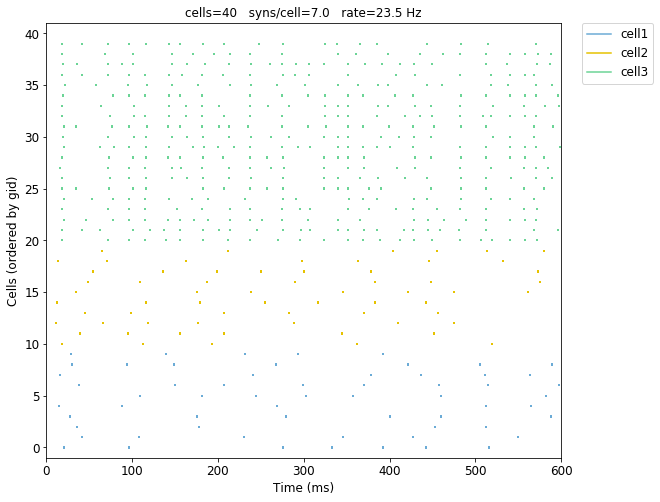

Plotting recorded cell traces ... cell


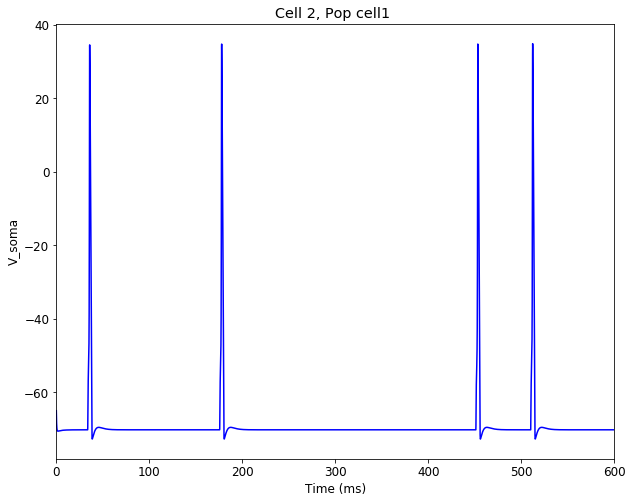

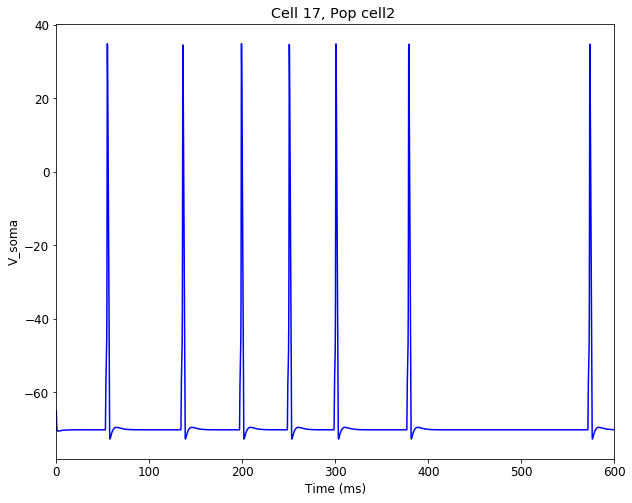

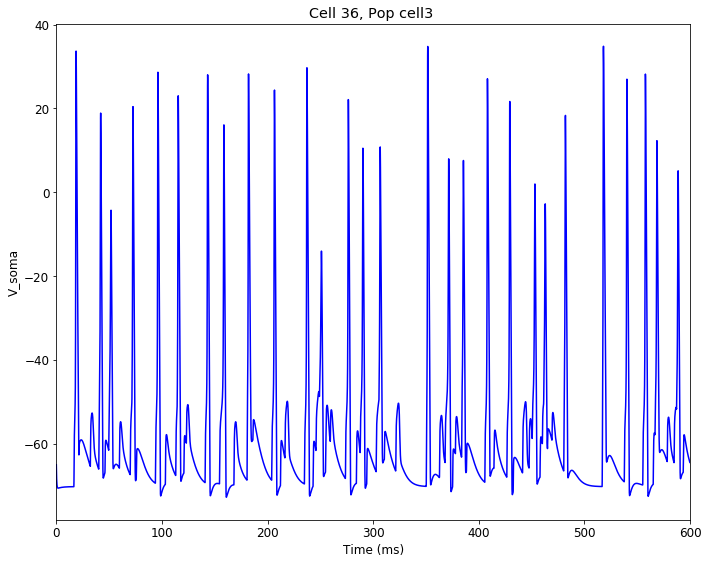

Plotting 2D representation of network cell locations and connections...


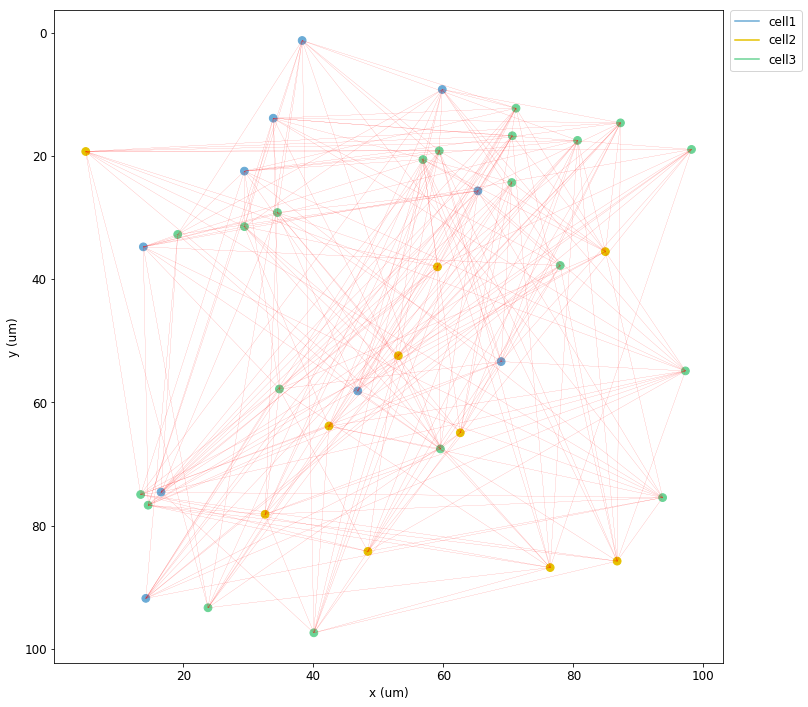

Plotting connectivity matrix...


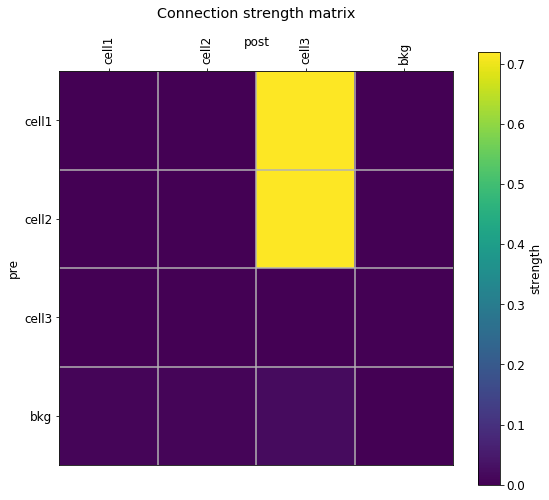

  Done; plotting time = 4.78 s

Total time = 6.35 s

End time:  2021-05-17 17:40:10.953839


In [9]:
# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)

### What do you observe regarding the firing rates of your three populations ? Explain.

From the plot above, we see that there is moderate firing in the cell populations 1 and 2 (with fewer neurons), and higher firing in the cell pouplation 2.  Indeed, as seen in the Raster, there is a considerably higher and more regular firing rate for the higher population than for the two smaller populations respectively.

Moreover, as indicated in the connectivitiy matrix, the two populations with fewer cells connect to the population with 20 cells.  As a result, the larger population receives input not only from activity within its own neurons and background input, but also from the two other populations.

#### -> Redoing simulation but without any connections between populations
Indeed if we simulate again but do not connect any of the populations, we observe:


Start time:  2021-05-17 17:51:27.826833

Creating network of 3 cell populations on 1 hosts...
  Number of cells on node 0: 40 
  Done; cell creation time = 0.00 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 40 
  Done; cell stims creation time = 0.01 s.
Recording 3 traces of 1 types on node 0

Running simulation for 600.0 ms...
  Done; run time = 0.39 s; real-time ratio: 1.54.

Gathering data...
  Done; gather time = 0.01 s.

Analyzing...
  Cells: 40
  Connections: 40 (1.00 per cell)
  Spikes: 253 (10.54 Hz)
  Simulated time: 0.6 s; 1 workers
  Run time: 0.39 s
Saving output as model_output.json  ... 
Finished saving!
  Done; saving time = 0.73 s.
Plotting raster...


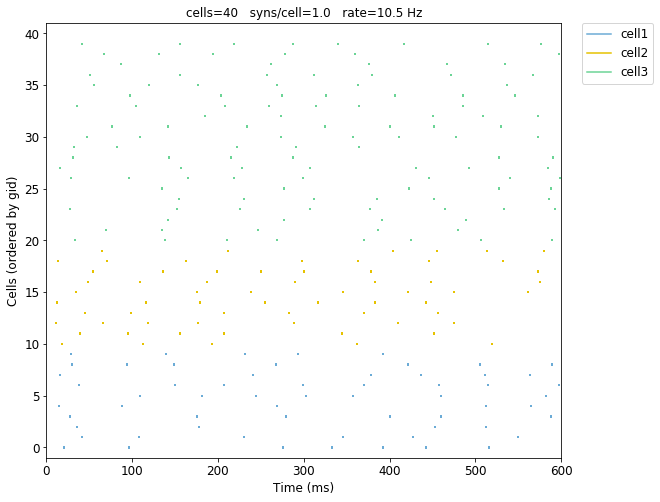

Plotting recorded cell traces ... cell


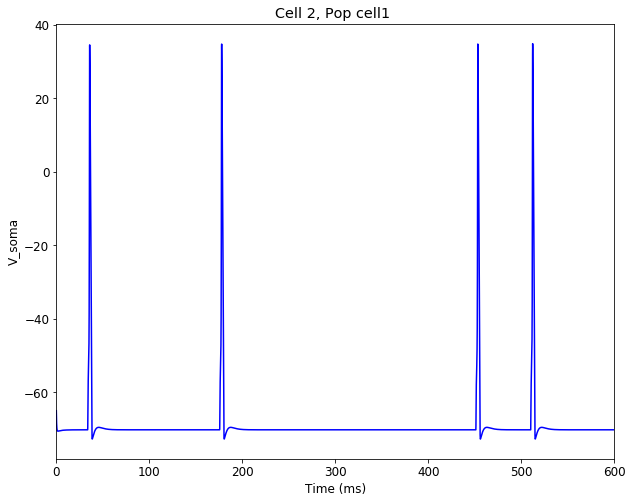

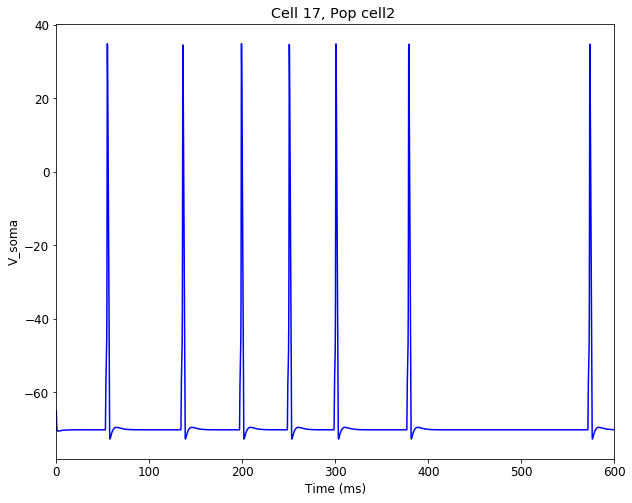

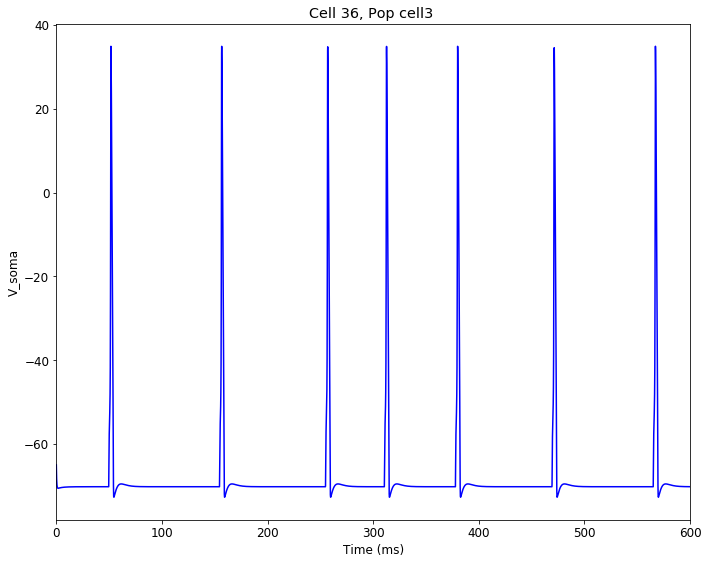

Plotting 2D representation of network cell locations and connections...


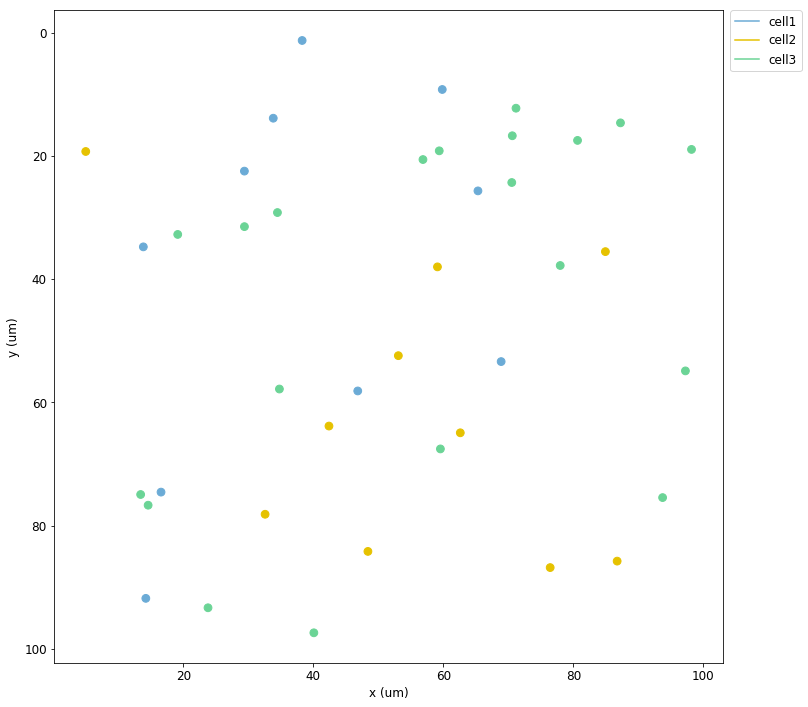

Plotting connectivity matrix...


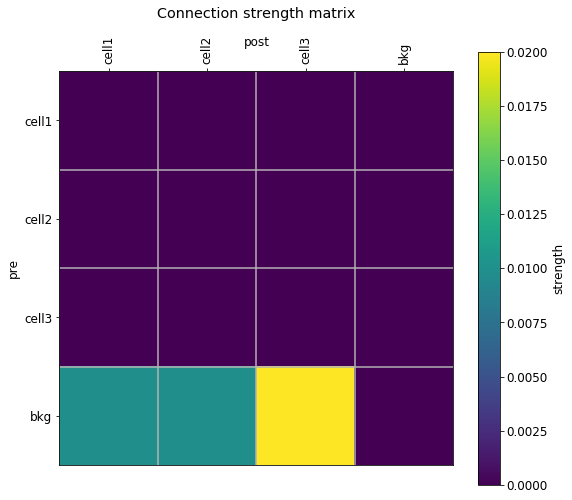

  Done; plotting time = 3.79 s

Total time = 4.93 s

End time:  2021-05-17 17:51:32.754862


In [10]:
from netpyne import specs, sim

%matplotlib inline

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

# Population parameters
# The 2 smaller populations 
netParams.popParams['cell1'] = {'cellType': 'PYR', 'numCells': 10, 'cellModel': 'HH'}
netParams.popParams['cell2'] = {'cellType': 'PYR', 'numCells': 10, 'cellModel': 'HH'}

# The 1 larger population
netParams.popParams['cell3'] = {'cellType': 'PYR', 'numCells': 20, 'cellModel': 'HH'}

## Cell property rules
cellRule = {'conds': {'cellType': 'PYR'},  'secs': {}}  # cell rule dict
cellRule['secs']['soma'] = {'geom': {}, 'mechs': {}}   # soma params dict
cellRule['secs']['soma']['geom'] = {'diam': 18.8, 'L': 18.8, 'Ra': 123.0}  # soma geometry
cellRule['secs']['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70} # soma hh mechanism
netParams.cellParams['PYRrule'] = cellRule # add dict to list of cell params

## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 5.0, 'e': 0}  # excitatory synaptic mechanism

# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 10, 'noise': 0.5}
netParams.stimTargetParams['bkg->PYR'] = {'source': 'bkg', 'conds': {'cellType': 'PYR'}, 'weight': 0.01, 'delay': 5, 'synMech': 'exc'}

## Cell connectivity rules
# NO CONNECTIVITY

# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration

simConfig.duration = 600            # Duration of the simulation, in ms
simConfig.dt = 0.02                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.1          # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'model_output' # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file
simConfig.saveJson = True 

# Plots
simConfig.analysis['plotRaster'] = True               # Plot a raster
simConfig.analysis['plotTraces'] = {'include': [('cell1',2), ('cell2', 7), ('cell3',16)]}   # Plot recorded traces for this list of cells
simConfig.analysis['plot2Dnet'] = True                # plot 2D visualization of cell positions and connections
simConfig.analysis['plotConn'] = True           # plot connectivity matrix

# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)

Indeed, we notice in the Raster plot that without the connection of the two smaller populations to the larger pouplation, the firing rate of the larger population is very similar to the smaller populations.  This can also be seen in the single-cell voltage trace, which show very similar behaviors among the three populations.  This similar firing rate can be explained by the fact that these three pouplations now recieve similar input from the background, and all other connections are set to zero (see connectivity matrix just above).

# Ex.2 Mouse thalamic network simulation

<font size='3'>Following the line of tutorial 02, build a thalamic-like network of dimensions: x = 100 µm, y = 800 µm and z = 100 µm.

<font size='3'>Your network will have 450 cells in total: 130 cell in the thalamic reticular neucleus (TRN) and 320 in the ventroposteriolateral neucleus. (VPL). The TRN only contains inhibitory cells, while the VPL is 6% inhibitory cells and 94% excitatory cells (real mouse data). 

<font size='3'>Use the same morphological, physiological, synaptic and stimulation parameters from tutorial 02 for the excitatory and inhibitory cell populations.

<font size='3'>Connect the excitatory cells so they target cells within the TRN. Connect the inhibitory cells to both excitatory and ihibitory cells with a connection probability that decays exponentially as a function of distance '0.4*exp(-dist_3D/probLengthConst)'.

<font size='3'>Add stimulation to VPL excitatory cells with a firing rate of 200 Hz and noise level of 0.3 and connect it with a weight of 0.01 and a delay of 5 ms.

<font size='3'>Run a simulation of 1000 ms, internal integration time steps of 0.05 ms and record steps time of 1 ms. Plot the 2D network representation of the cell locations and connections and the connectivity matrix. [2.5 pts]

<font size='3'><font color='red'> Restart Kernel out of precaution

## Step 1: Import Libraries

In [1]:
from netpyne import specs, sim

%matplotlib inline

## Step 2: Define network parameters - dimensions

In [2]:
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

netParams.sizeX = 100 # x-dimension (horizontal length) size in um
netParams.sizeY = 800 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 100 # z-dimension (horizontal length) size in um

# The following parameters were kept the same as before
netParams.propVelocity = 100.0 # propagation velocity (um/ms)
netParams.probLengthConst = 150.0 # length constant for conn probability (um)

### 2.1. Define Cell Populations

To define in which yRange the cell populations are located, we considered the images below:

![thalamus_views](thalamus_views.gif)

![mouse_brain](mouse_brain.jpg)

As a result, from the plots above we can identify where the VPL and TRN, are located.  Moreover, according to ["Neuroanatomy, Thalamic Nuclei"](https://www.ncbi.nlm.nih.gov/books/NBK549908/),  the reticular nucleus envelops each lateral thalamus. This nucleus is unique in that its projections do not go to the cortex: its projections circle back to the thalamus itself, from which it received its inputs. Therefore, the reticular nucleus allows to regulate the activity of the thalamus.

As a result, we gather from the information above that the cell population distribution between the TRN and VPL can be as such:

![rectangle_rep](rectangle_rep.jpg)

In [3]:
## Population parameters

# Creating inhibitory cell population of the thalamic reticular nucleus
netParams.popParams['I_TRN'] = {'cellType': 'I', 'numCells': 130, 'yRange': [0,200], 'cellModel': 'HH'}

# Creating Population of cells in the ventroposterioral nucleus (320*0.06 inhibitory and 320*0.94 excitatory)
netParams.popParams['E_VPL'] = {'cellType': 'E', 'numCells': 300, 'yRange': [200,800], 'cellModel': 'HH'}
netParams.popParams['I_VPL'] = {'cellType': 'I', 'numCells': 20, 'yRange': [200,800], 'cellModel': 'HH'}

### 2.2. Define cell morphologies and physiology

In [4]:
## Cell property rules
cellRule = {'conds': {'cellType': 'E'},  'secs': {}}  # cell rule dict
cellRule['secs']['soma'] = {'geom': {}, 'mechs': {}}                              # soma params dict
cellRule['secs']['soma']['geom'] = {'diam': 15, 'L': 14, 'Ra': 120.0}                   # soma geometry
cellRule['secs']['soma']['mechs']['hh'] = {'gnabar': 0.13, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}      # soma hh mechanism
netParams.cellParams['Erule'] = cellRule                          # add dict to list of cell params

cellRule = {'conds': {'cellType': 'I'},  'secs': {}}  # cell rule dict
cellRule['secs']['soma'] = {'geom': {}, 'mechs': {}}                              # soma params dict
cellRule['secs']['soma']['geom'] = {'diam': 10.0, 'L': 9.0, 'Ra': 110.0}                  # soma geometry
cellRule['secs']['soma']['mechs']['hh'] = {'gnabar': 0.11, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}      # soma hh mechanism
netParams.cellParams['Irule'] = cellRule                          # add dict to list of cell params

### 2.3. Define synaptic mechanisms

In [5]:
## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.8, 'tau2': 5.3, 'e': 0}  # NMDA synaptic mechanism
netParams.synMechParams['inh'] = {'mod': 'Exp2Syn', 'tau1': 0.6, 'tau2': 8.5, 'e': -75}  # GABA synaptic mechanism

### 2.4. Stimulation

In [6]:
# Stimulation parameters
# Background input
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 20, 'noise': 0.3}
netParams.stimTargetParams['bkg->all'] = {'source': 'bkg', 'conds': {'cellType': ['E','I']}, 'weight': 0.01, 'delay': 'max(1, normal(5,2))', 'synMech': 'exc'}

# Stimulating VPL excitatory cells
# Stimulation parameters
netParams.stimSourceParams['stim_VPL'] = {'type': 'NetStim', 'rate': 200, 'noise': 0.3}
netParams.stimTargetParams['stim_VPL->E'] = {'source': 'stim_VPL', 'conds': {'cellType': ['E']}, 'weight': 0.01, 'delay': 5, 'synMech': 'exc'}


## Step 3: Connecting the cells

In [7]:
## Cell connectivity rules

# Connecting the excitatory cells so that target cells within TRN
netParams.connParams['E_VPL->I_TRN'] = { #  E_VPL -> I_TRN label
    'preConds': {'pop': 'E_VPL'},        # conditions of presyn cells
    'postConds': {'pop': 'I_TRN'},       # conditions of postsyn cells
    'divergence': 12,                    # probability of connection
    'weight': 0.01,                      # synaptic weight
    'delay': 5,                          # transmission delay (ms)
    'synMech': 'exc'}                    # synaptic mechanism

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# PLEASE ERASE THIS BUT IT WAS FOR INDICATION, THIS WAS THE CODE WHICH LED TO NO CONNECTIONS, THERE WAS A MIXUP BETWEEN CELL TYPE AND POP!!!!
#  'preConds': {'cellType': ['I_VPL', 'I_TRN']}, 'postConds': {'pop': ['E_VPL', 'I_TRN', 'I_VPL']},   #  I -> E

# Connecting the inhibitory cells to both excitatory and inhibitory cells
netParams.connParams['I_VPL->E_VPL'] = {
  'preConds': {'pop': ['I_VPL']}, 'postConds': {'pop': ['E_VPL', 'I_TRN']},   #  I -> E
  'probability': '0.4*exp(-dist_3D/probLengthConst)',   # probability of connection
  'weight': 0.001,                                      # synaptic weight
  'delay': 'dist_3D/propVelocity',                      # transmission delay (ms)
  'synMech': 'inh'}                                     # synaptic mechanism

# Connecting the inhibitory cells to both excitatory and inhibitory cells
netParams.connParams['I->E_VPL'] = {
  'preConds': {'pop': ['I_TRN']}, 'postConds': {'pop': ['E_VPL', 'I_VPL']},   #  I -> E
  'probability': '0.4*exp(-dist_3D/probLengthConst)',   # probability of connection
  'weight': 0.001,                                      # synaptic weight
  'delay': 'dist_3D/propVelocity',                      # transmission delay (ms)
  'synMech': 'inh'}    # synaptic mechanism

### Step 4: Run Simulation


Start time:  2021-05-18 17:38:14.645829

Creating network of 3 cell populations on 1 hosts...
  Number of cells on node 0: 450 
  Done; cell creation time = 0.05 s.
Making connections...
  Number of connections on node 0: 6906 
  Done; cell connection time = 1.19 s.
Adding stims...
  Number of stims on node 0: 750 
  Done; cell stims creation time = 0.09 s.
Recording 0 traces of 0 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 14.29 s; real-time ratio: 0.07.

Gathering data...
  Done; gather time = 0.40 s.

Analyzing...
  Cells: 450
  Connections: 7356 (16.35 per cell)
  Synaptic contacts: 7656 (17.01 per cell)
  Spikes: 4045 (8.99 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 14.29 s
  Done; saving time = 0.02 s.
Plotting raster...


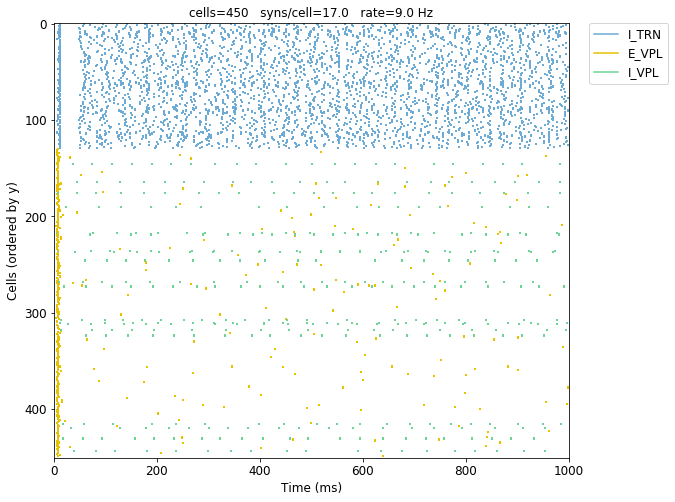

Plotting recorded cell traces ... cell


<Figure size 432x288 with 0 Axes>

Plotting 2D representation of network cell locations and connections...


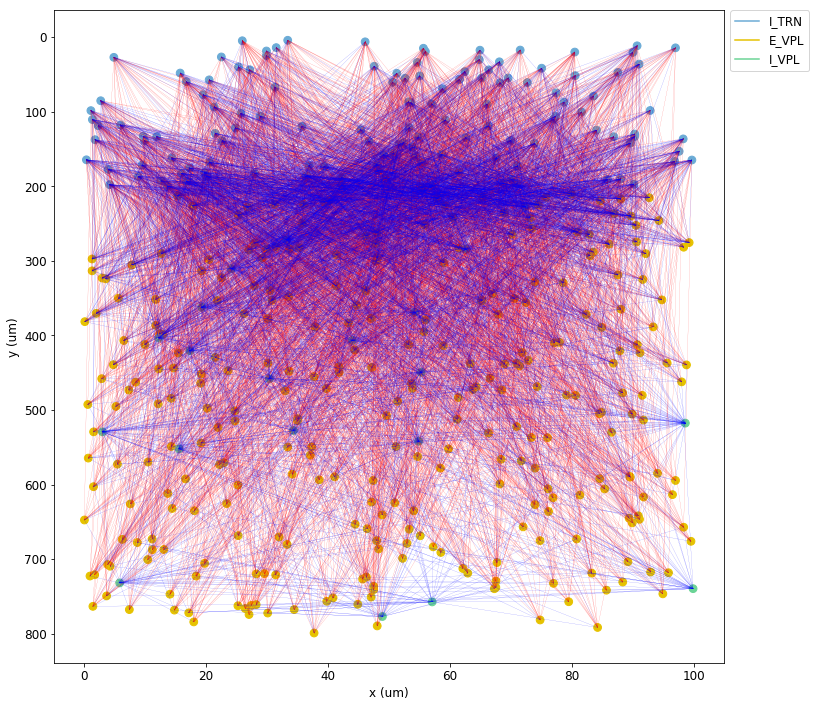

Plotting connectivity matrix...


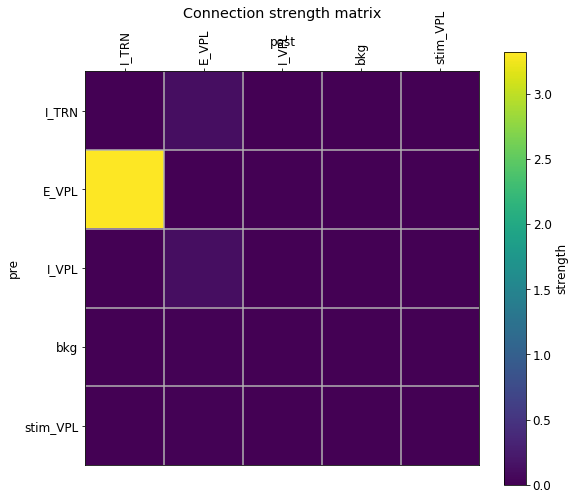

  Done; plotting time = 38.46 s

Total time = 54.50 s

End time:  2021-05-18 17:39:09.150339


In [8]:
# Simulation options
simConfig = specs.SimConfig()        # object of class SimConfig to store simulation configuration

simConfig.duration = 1*1e3           # Duration of the simulation, in ms
simConfig.dt = 0.05                 # Internal integration timestep to use
simConfig.verbose = False            # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 1             # Step size in ms to save data (e.g. V traces, LFP, etc)
simConfig.filename = 'model_output'  # Set file output name
simConfig.savePickle = False         # Save params, network and sim output to pickle file

simConfig.analysis['plotRaster'] = {'orderBy': 'y', 'orderInverse': True}      # Plot a raster
simConfig.analysis['plotTraces'] = {'include': [('E2',0), ('E5', 5)]}      # Plot recorded traces for this list of cells
simConfig.analysis['plot2Dnet'] = True           # plot 2D visualization of cell positions and connections
simConfig.analysis['plotConn'] = True           # plot connectivity matrix

# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)

From the connectivity matrix, we can first notice that the stimulation coming onto the inhibitory neurons of the TRN has an effect, and shows a strength connection that is relatively high from the excitatory cells of the VPL onto the inhibitory cells of the TRN. The effect of this stimulation can be observed in the raster plot: the excitatory cell population of the VPL connect onto the TRN population: leading to an increased firing rate of these inhibitory cell.  This TRN inhibitory population in turn, inhibits the excitatory and inhibitory populations of the VPL.  Ineed, we can see a lower firing rate for excitatory cells.

However, when we increase the connection probability of both inhibitory population compared to the excitatory cell population, we notice a shift in the connectivity matrix:


Start time:  2021-05-18 17:43:42.605048

Creating network of 3 cell populations on 1 hosts...
  Number of cells on node 0: 450 
  Done; cell creation time = 0.49 s.
Making connections...
  Number of connections on node 0: 6906 
  Done; cell connection time = 0.96 s.
Adding stims...
  Number of stims on node 0: 750 
  Done; cell stims creation time = 0.08 s.
Recording 0 traces of 0 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 15.05 s; real-time ratio: 0.07.

Gathering data...
  Done; gather time = 0.42 s.

Analyzing...
  Cells: 450
  Connections: 7356 (16.35 per cell)
  Synaptic contacts: 7656 (17.01 per cell)
  Spikes: 3688 (8.20 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 15.05 s
  Done; saving time = 0.03 s.
Plotting raster...


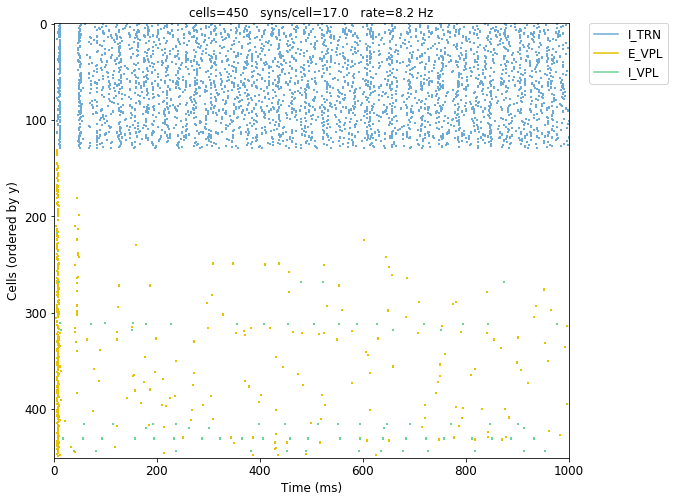

Plotting recorded cell traces ... cell


<Figure size 432x288 with 0 Axes>

Plotting 2D representation of network cell locations and connections...


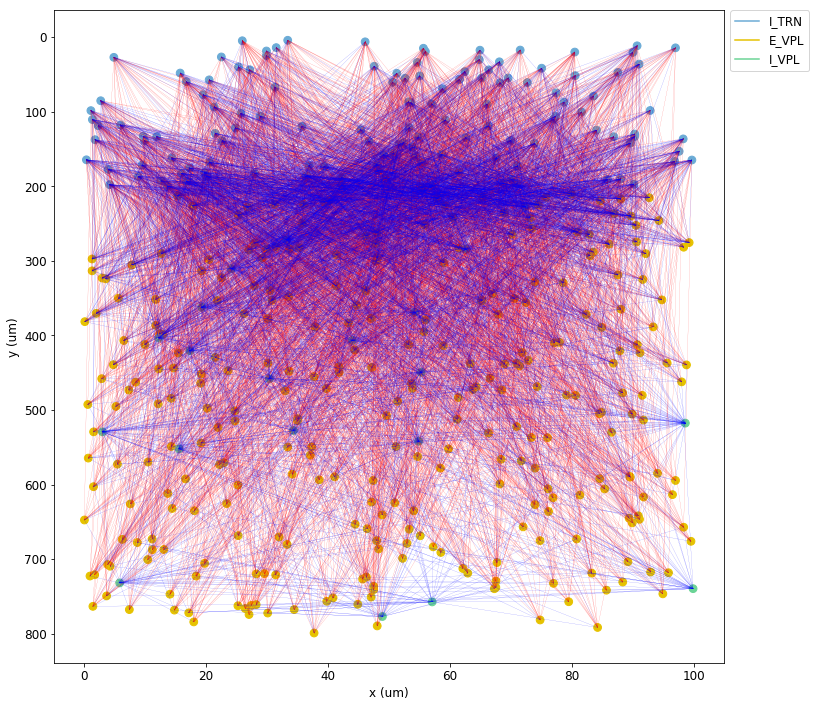

Plotting connectivity matrix...


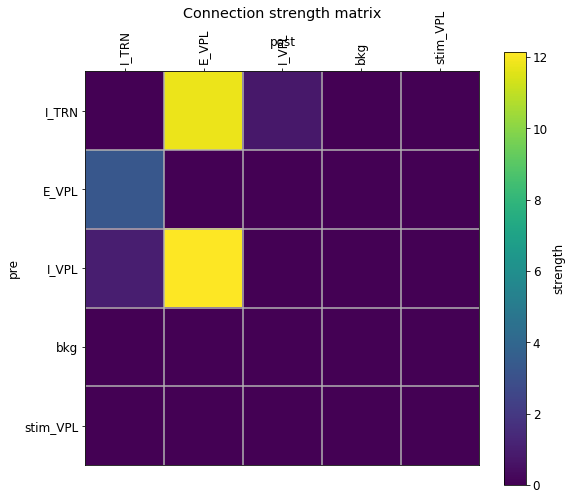

  Done; plotting time = 37.66 s

Total time = 54.75 s

End time:  2021-05-18 17:44:37.354312


In [9]:
## Cell connectivity rules

# Connecting the excitatory cells so that target cells within TRN
netParams.connParams['E_VPL->I_TRN'] = { #  E_VPL -> I_TRN label
    'preConds': {'pop': 'E_VPL'},        # conditions of presyn cells
    'postConds': {'pop': 'I_TRN'},       # conditions of postsyn cells
    'divergence': 12,                    # probability of connection
    'weight': 0.01,                      # synaptic weight
    'delay': 5,                          # transmission delay (ms)
    'synMech': 'exc'}                    # synaptic mechanism

# Connecting the inhibitory cells to both excitatory and inhibitory cells
netParams.connParams['I_VPL->E_VPL'] = {
  'preConds': {'pop': ['I_VPL']}, 'postConds': {'pop': ['E_VPL', 'I_TRN']},   #  I -> E
  'probability': '0.4*exp(-dist_3D/probLengthConst)',   # probability of connection
  'weight': 0.1,                                      # synaptic weight
  'delay': 'dist_3D/propVelocity',                      # transmission delay (ms)
  'synMech': 'inh'}                                     # synaptic mechanism

# Connecting the inhibitory cells to both excitatory and inhibitory cells
netParams.connParams['I->E_VPL'] = {
  'preConds': {'pop': ['I_TRN']}, 'postConds': {'pop': ['E_VPL', 'I_VPL']},   #  I -> E
  'probability': '0.4*exp(-dist_3D/probLengthConst)',   # probability of connection
  'weight': 0.1,                                      # synaptic weight
  'delay': 'dist_3D/propVelocity',                      # transmission delay (ms)
  'synMech': 'inh'}    # synaptic mechanism

# Simulation options
simConfig = specs.SimConfig()        # object of class SimConfig to store simulation configuration

simConfig.duration = 1*1e3           # Duration of the simulation, in ms
simConfig.dt = 0.05                 # Internal integration timestep to use
simConfig.verbose = False            # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 1             # Step size in ms to save data (e.g. V traces, LFP, etc)
simConfig.filename = 'model_output'  # Set file output name
simConfig.savePickle = False         # Save params, network and sim output to pickle file

simConfig.analysis['plotRaster'] = {'orderBy': 'y', 'orderInverse': True}      # Plot a raster
simConfig.analysis['plotTraces'] = {'include': [('E2',0), ('E5', 5)]}      # Plot recorded traces for this list of cells
simConfig.analysis['plot2Dnet'] = True           # plot 2D visualization of cell positions and connections
simConfig.analysis['plotConn'] = True           # plot connectivity matrix

# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)

Indeed, by increasing the weights of those inhibitory probability connections, we see that there is an even stronger inhibition on the pyramidal cells compared to the previous case.  Moreover, we can identify that cells which are closer to the TRN cells have a firing rate which is considerably smaller than the cells which are further away: this could be due to the delay which is more important than for the cells which are more distant (indeed, the delay is a function of exp(-distance), so it decreases when the distance increases).  Moreover, we notice in the connectivity matrix that the strength of the connection is much stronger from the inhibitory neuron populations onto the excitatory cell population of the VPL than the excitatory cell onto the inhibitory TRN population.

# Ex3. Detailed cell morphology network

<font size='3'>You are going to build a network with the set of cells asigned to your group in week2. First you have to create a .py file per each morphology with the morphological and biophysical characteristics for each cell. You can use the biophysics used in the previous tutorials.
    
<font size='3'>Create five populations of cells (for each of the morphologies) with five 3D compartmental Hodgkin-Huxley type cells (HH3D) each, taking care of the differences between pyramidal (E) and inhibitory cells (I). Connect the three excitatory cell populations among themselves and the two inhibitory cell populations to the excitatory ones, but not to each other. 
<font size='3'>Add background stimulation to the ihibitory cells with a firing rate of 100 Hz and noise level of 0.5 and connect it with a weight of 0.01 and a delay of 5 ms.

<font size='3'>Run a simulation of 300 ms. Use the same synaptic and stimulation parameters used in tutorial 03. Plot the rater plot, the 2D network representation of the cell locations and connections and the connectivity matrix. [2 pts]

<font size='3'><font color='red'> Restart Kernel out of precaution


## Step 1: Importing the libraries

In [1]:
from netpyne import specs, sim

%matplotlib inline

## Step 2: Create .py files per morphology

The .py files were loaded, copying the preexisting pyramidal and inhibitory files, except that we modified the name of the swc file which was loaded.

## Step 3: Define network parameters

In [2]:
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

### 3.1. Defining Cell Populations

In [3]:
## Population parameters
netParams.popParams['Pyr1'] = {'cellType': 'Pyr1', 'numCells': 5, 'cellModel': 'HH3D'}
netParams.popParams['Pyr2'] = {'cellType': 'Pyr2', 'numCells': 5, 'cellModel': 'HH3D'}
netParams.popParams['Pyr3'] = {'cellType': 'Pyr3', 'numCells': 5, 'cellModel': 'HH3D'}
netParams.popParams['Inh1'] = {'cellType': 'Inh1', 'numCells': 5, 'cellModel': 'HH3D'}
netParams.popParams['Inh2'] = {'cellType': 'Inh2', 'numCells': 5, 'cellModel': 'HH3D'}

### 3.2. Defining Cell Morphologies and Physiology

In [4]:
# Defining the rules for the pyramidal cells
cellRule = netParams.importCellParams(label='PYR1_HH3D', conds={'cellType': 'Pyr1', 'cellModel': 'HH3D'},
        fileName='morph_06.py', cellName='PYR1', importSynMechs=True)
netParams.cellParams['E1rule'] = cellRule  

cellRule = netParams.importCellParams(label='PYR2_HH3D', conds={'cellType': 'Pyr2', 'cellModel': 'HH3D'},
        fileName='morph_07.py', cellName='PYR2', importSynMechs=True)
netParams.cellParams['E2rule'] = cellRule  

cellRule = netParams.importCellParams(label='PYR3_HH3D', conds={'cellType': 'Pyr3', 'cellModel': 'HH3D'},
        fileName='morph_09.py', cellName='PYR3', importSynMechs=True)
netParams.cellParams['E3rule'] = cellRule  

# Defining the rules for the inhibitory cells
cellRule = netParams.importCellParams(label='INH1_HH3D', conds={'cellType': 'Inh1', 'cellModel': 'HH3D'},
        fileName='morph_03.py', cellName='INH1', importSynMechs=True)
netParams.cellParams['I1rule'] = cellRule 

cellRule = netParams.importCellParams(label='INH2_HH3D', conds={'cellType': 'Inh2', 'cellModel': 'HH3D'},
        fileName='morph_10.py', cellName='INH2', importSynMechs=True)
netParams.cellParams['I2rule'] = cellRule 

error Pyr_01.swc line 12052: could not parse: 
error morph_07.swc line 19678: could not parse: 
error morph_09.swc line 6173: could not parse: 
error morph_03.swc line 7281: could not parse: 
error morph_10.swc line 3377: could not parse: 


### 3.3. Defining Synaptic Mechanisms

In [5]:
## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.8, 'tau2': 5.3, 'e': 0}  # NMDA synaptic mechanism
netParams.synMechParams['inh'] = {'mod': 'Exp2Syn', 'tau1': 0.6, 'tau2': 8.5, 'e': -75}  # GABA synaptic mechanism

### 3.4. Stimulation

In [6]:
# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 100, 'noise': 0.5}
netParams.stimTargetParams['bkg->all'] = {'source': 'bkg', 'conds': {'cellType': ['Inh1', 'Inh2']}, 'weight': 0.01, 'delay': 5, 'synMech': 'exc'}

### 3.5. Connectivity

In [7]:
## Cell connectivity rules
netParams.connParams['all Pyr-> all Pyr'] = { 
    'preConds': {'pop': ['Pyr1', 'Pyr2', 'Pyr3']},   # conditions of presyn cells
    'postConds': {'pop': ['Pyr1', 'Pyr2', 'Pyr3']},  # conditions of postsyn cells
    'divergence': 12,            # probability of connection
    'weight': 0.5,               # synaptic weight
    'delay': 5,                  # transmission delay (ms)
    'synMech': 'exc'}            # synaptic mechanism   

netParams.connParams['Inh1-> all Pyr'] = { 
    'preConds': {'pop': 'Inh1'},   # conditions of presyn cells
    'postConds': {'pop': ['Pyr1', 'Pyr2', 'Pyr3']},  # conditions of postsyn cells
    'divergence': 12,            # probability of connection
    'weight': 0.5,               # synaptic weight
    'delay': 5,                  # transmission delay (ms)
    'synMech': 'inh'}            # synaptic mechanism   

netParams.connParams['Inh2-> all Pyr'] = { 
    'preConds': {'pop': 'Inh2'},   # conditions of presyn cells
    'postConds': {'pop': ['Pyr1', 'Pyr2', 'Pyr3']},  # conditions of postsyn cells
    'divergence': 12,            # probability of connection
    'weight': 0.5,               # synaptic weight
    'delay': 5,                  # transmission delay (ms)
    'synMech': 'inh'}            # synaptic mechanism   

## Step 4: Running the Stimulation

In [8]:
# Simulation options
simConfig = specs.SimConfig()           # object of class SimConfig to store simulation configuration

simConfig.duration = 300            # Duration of the simulation, in ms
simConfig.dt = 0.025                    # Internal integration timestep to use
simConfig.verbose = False               # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.1              # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'model_output'     # Set file output name
simConfig.savePickle = False            # Save params, network and sim output to pickle file
simConfig.saveJson = True 

# Plots
simConfig.analysis['plotRaster'] = True       # Plot a raster
simConfig.analysis['plot2Dnet'] = True        # plot 2D visualization of cell positions and connections
simConfig.analysis['plotConn'] = True           # plot connectivity matrix



Start time:  2021-05-18 09:39:15.403513

Creating network of 5 cell populations on 1 hosts...
  Number of cells on node 0: 25 
  Done; cell creation time = 4.32 s.
Making connections...
  Number of connections on node 0: 300 
  Done; cell connection time = 0.03 s.
Adding stims...
  Number of stims on node 0: 10 
  Done; cell stims creation time = 0.00 s.
Recording 0 traces of 0 types on node 0

Running simulation for 300.0 ms...
  Done; run time = 46.57 s; real-time ratio: 0.01.

Gathering data...
  Done; gather time = 2.60 s.

Analyzing...
  Cells: 25
  Connections: 310 (12.40 per cell)
  Spikes: 104 (13.87 Hz)
  Simulated time: 0.3 s; 1 workers
  Run time: 46.57 s
Saving output as model_output.json  ... 
Finished saving!
  Done; saving time = 10.69 s.
Plotting raster...


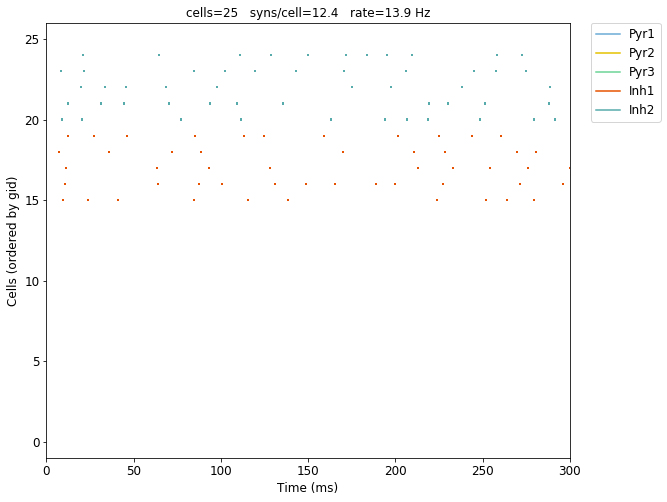

Plotting 2D representation of network cell locations and connections...


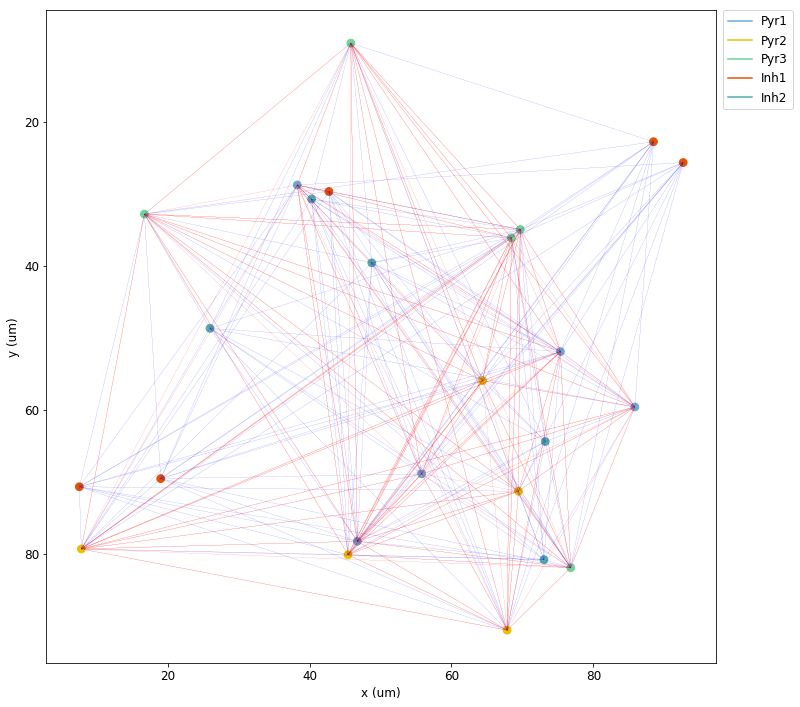

Plotting connectivity matrix...


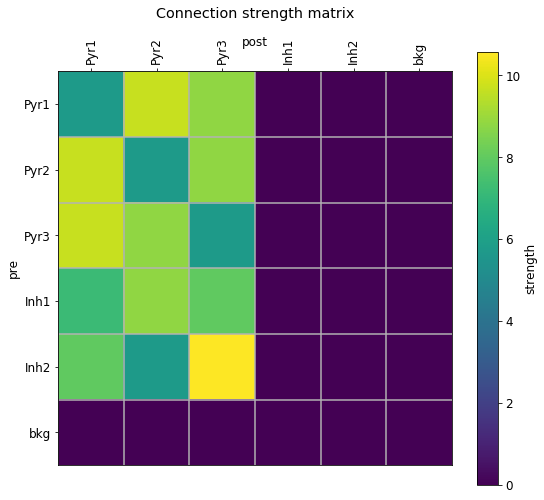

  Done; plotting time = 3.13 s

Total time = 67.44 s

End time:  2021-05-18 09:40:22.846253


In [9]:
# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)